# Introducción

OilyGiant es una compañía miner que esta buscando la mejor ubicación para un nuevo pozo petrolero, con los datos disponibles de tres regiones se conocen los parámetros de cada pozo petrolero de la región. OilyGiante quiere establecer cuál de estas tres regiones puede gerenar el mayor margen de beneficio, por lo cuál se va a desarrollar un modelo de machine learning que nos permita establecer los riesgos y beneficios potenciales de cada región con el fin de determinar la región más apta para el nuevo pozo.

# Objetivos

1.Recolectar los parámetros: calidad del petróleo y volumen de reservas.
2.Construir un modelo para predecir el volumen de resrvas en los nuevos pozos.
3.Seleccionar los pozos con valores estimados más altos.
4.Elegir la región con el mayor beneficio total.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [163]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

# Exploración de los datasets

In [164]:
region_1.shape

(100000, 5)

In [165]:
region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [166]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


El conjunto de datos de la Región 0 contiene 100,000 registros sin valores nulos y cinco columnas: un identificador único (id), tres características (f0, f1, f2), y el volumen de reservas (product), que es nuestra variable objetivo. Las características y el objetivo son de tipo float64, lo cual es ideal para construir un modelo de regresión lineal. Este conjunto de datos es adecuado para el análisis y modelado sin necesidad de limpieza adicional.

In [167]:
region_2.shape

(100000, 5)

In [168]:

print(region_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [169]:
region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


El conjunto de datos de la Región 1 también contiene 100,000 registros sin valores nulos y cinco columnas: un identificador único (id), tres características (f0, f1, f2), y la variable objetivo (product), que representa el volumen de reservas en miles de barriles. Todas las características y el objetivo son de tipo float64, lo cual es adecuado para entrenar un modelo de regresión lineal. Los datos están limpios y listos para su análisis y modelado, con un tamaño de 3.8 MB.

In [170]:
region_3.shape

(100000, 5)

In [171]:
region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [172]:
print(region_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


El conjunto de datos de la Región 2 contiene 100,000 registros completos, sin valores nulos, y cinco columnas: un identificador único (id), tres características (f0, f1, f2), y la variable objetivo (product), que representa el volumen de reservas en miles de barriles. Las características y el objetivo son de tipo float64, lo cual es ideal para el modelado de regresión lineal. Este conjunto de datos está limpio y listo para su análisis y modelado, ocupando aproximadamente 3.8 MB de memoria.

In [173]:
list_datasets = [region_1, region_2, region_3]

region_1.name = 'Región 1'
region_2.name = 'Región 2'
region_3.name = 'Región 3'

for i in list_datasets:
    duplicates =  i.duplicated().sum()
    print('Número de valores duplicados', i.name, ':', duplicates)

Número de valores duplicados Región 1 : 0
Número de valores duplicados Región 2 : 0
Número de valores duplicados Región 3 : 0


# Visualización de Histogramas para observar distribuciones¶

En los tres data sets de la empresa se observa una variables discreta que es la "id" de cada pozo. Sin embargo, se registraron cuatro variables continuas, se va a realizar un breve análisis exploratorio de cada variable en cada una de las tres regiones, se procedera a utilizar la función hist para realizar un histograma de frecuencia de las columnas "f0, f1, f2, y product", la función contará con los siguientes argumentos:


region:dataset de cada región 

region_name:nombre de cada región

bins:número de contenedores para trazar histogramas

In [174]:
def hist(region, region_name='', bins=0):
    numerical_data = ['f0', 'f1', 'f2', 'product']
    a = 2
    b = 2
    c = 1
    fig = plt.subplots(figsize=(10,6))
    for i in numerical_data:
        plt.subplot(a, b, c)
        plt.title(i)
        region[i].hist(bins=bins, edgecolor = 'black', linewidth=0.8)
        c = c + 1
    plt.suptitle(region_name)
    plt.tight_layout()
    plt.show()

# Región 1

In [175]:
region_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


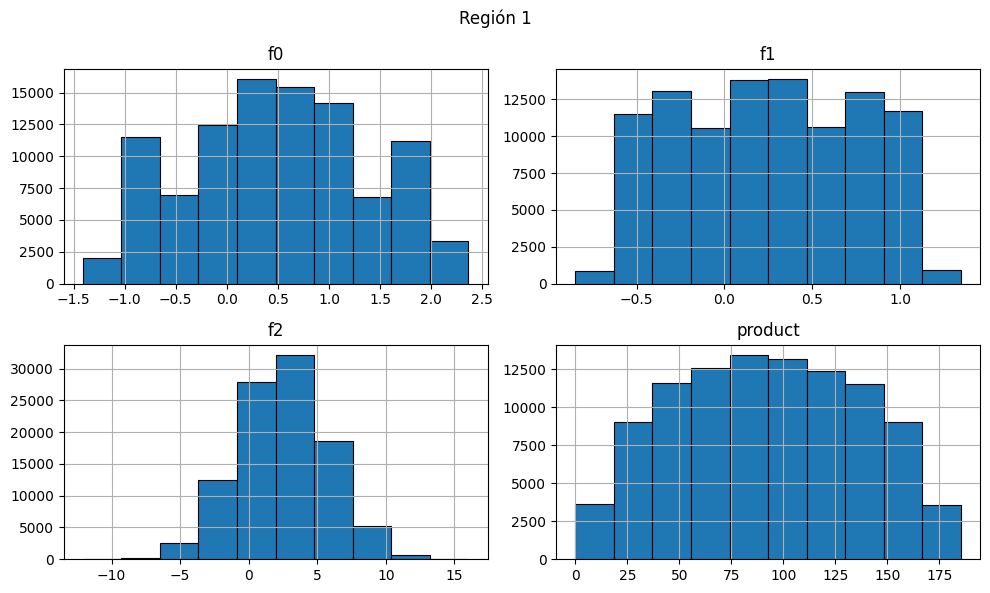

In [176]:
hist(region_1, 'Región 1', 10)

En la región 1 se puede observar una distribución "normal" para las variables f0, f2 y product, se encontro un leve sesgo hacia la izquierda en las variables f0, f1 y f2 en las cuales se registra una mediana ligeramente mayor a la media. Mientras que la variable products se observa una asimetría positiva con una media mayor a la mediana, el volumen promedio de reservas de barriles es de 92.5. 

# Región 2


In [177]:
region_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


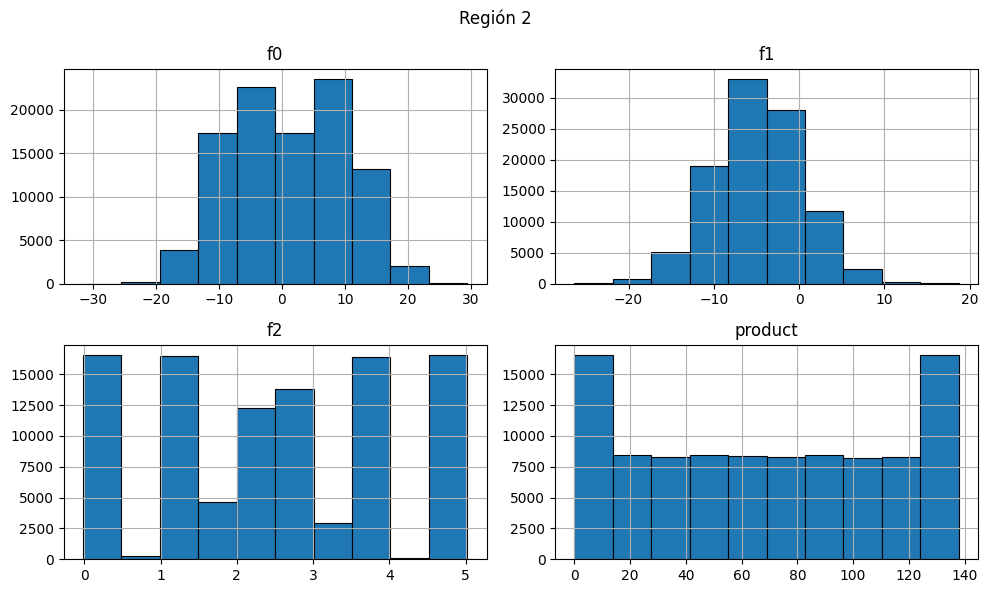

In [178]:
hist(region_2, 'Región 2', 10)

En la Región 2, las distribuciones de las variables f0 y f1 tienen una forma similar a una campana de Gauss, aunque presentan características distintas en cuanto a su asimetría: f0 muestra una asimetría negativa, mientras que f1 tiene una asimetría positiva. Por otro lado, la variable f2 no sigue una distribución uniforme ni normal, presentando varios picos en su gráfico y mostrando una asimetría positiva, donde la media supera a la mediana. Finalmente, la variable product se distribuye de manera uniforme en función de los diferentes volúmenes de reserva, con un promedio de reservas de 68.82 en esta región.

# Región 3

In [179]:
region_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


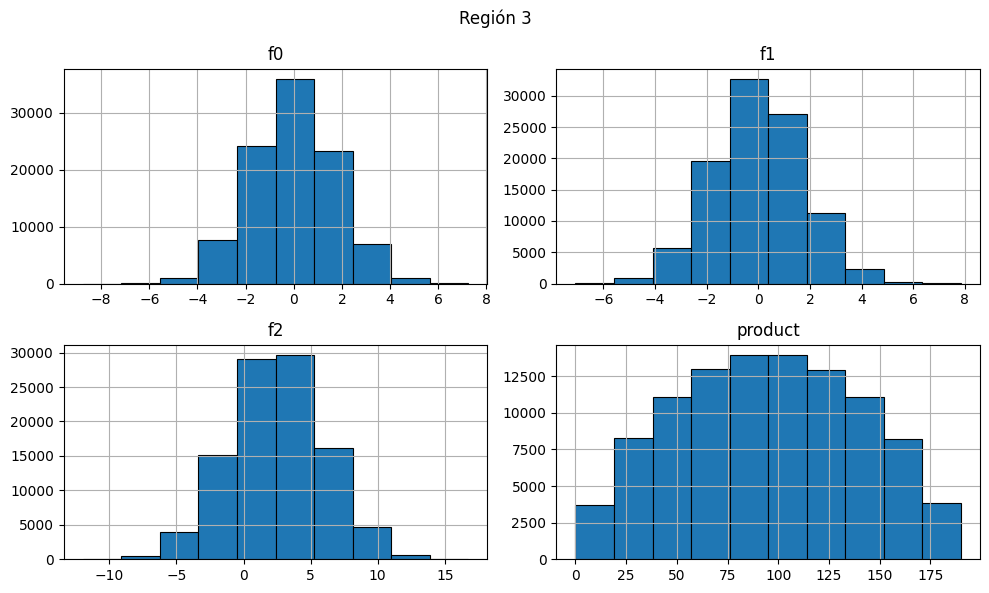

In [180]:
hist(region_3, 'Región 3', 10)

En la Región 3, las cuatro variables continuas presentan distribuciones que se asemejan a una normal. En particular, las variables f0 y f1 muestran una mínima diferencia entre sus medias y medianas, aunque ambas tienen una ligera asimetría positiva. La variable f2 también exhibe una asimetría positiva, caracterizada por una media superior a la mediana. En cuanto a la variable product, los datos muestran un ligero sesgo hacia la derecha, con un volumen promedio de 95 mil barriles para esta región.

# Análisis de correlación

Se va a realizar un análisis de correlación con el fin de para establecer que varibles tienen mayor correlación, con nuestra variable 'product'.

In [181]:
region_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


En la Región 1, se identifica una correlación positiva de moderada a fuerte entre la variable f2 y product, lo que sugiere que un aumento en f2 está asociado con un incremento en el volumen de petróleo en las reservas. Asimismo, se observa una correlación positiva, aunque de menor magnitud (moderada a baja), entre f0 y product. Por el contrario, la variable f1 presenta una correlación negativa de moderada a débil con product, indicando una relación inversa entre estas variables.

Por último, se destaca una correlación negativa de moderada a fuerte entre f1 y f0, mientras que las demás correlaciones son cercanas a cero. Esto último sugiere que, aunque existen relaciones entre algunas variables, estas no son lineales en la mayoría de los casos.

In [182]:
region_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


En la Región 2, se identifica una correlación muy fuerte entre las variables f2 y product, con un valor de 0.999, lo que indica una relación lineal casi perfecta. Esto sugiere que un aumento en f2 está prácticamente garantizado de acompañarse por un incremento en product. Esta alta correlación podría estar relacionada con las distribuciones no normales observadas en los histogramas de frecuencias de estas variables en esta región.

Por otro lado, se registra una correlación positiva de moderada a baja entre las variables f1 y f0, mientras que las demás correlaciones son cercanas a cero, indicando que no hay relaciones significativas o lineales entre esas variables.

In [183]:
region_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


En la Región 3, f2 muestra una correlación positiva moderada con product (0.44), indicando que mayores valores de f2 tienden a asociarse con más petróleo en los pozos. Este patrón es consistente en las tres regiones, destacando a f2 como una variable clave para el modelo. Las demás variables no presentan correlaciones lineales significativas.

# Conclusiones

Se importaron los datasets de las tres regiones y, tras una exploración inicial, no se detectaron valores ausentes ni duplicados, y los tipos de datos fueron los adecuados, por lo que no fue necesario realizar correcciones.

El análisis exploratorio de las variables numéricas mostró un comportamiento similar en las Regiones 1 y 3, ambas con un volumen promedio superior a 90 mil barriles. En contraste, la Región 2 presentó una distribución diferente, con un volumen promedio de reservas de 68 mil barriles.

Además, se identificó una fuerte correlación positiva entre f2 y product en las tres regiones, siendo más alta en la Región 2. Esto confirma que f2 será una variable clave en la construcción de nuestro modelo de machine learning.

# Preparación de datos fuente

La empresa OilyGiant tiene como objetivo desarrollar un modelo que identifique la región con el mayor margen de ganancias. Para ello, construiremos un modelo predictivo enfocado en estimar el volumen de reservas en cada región. Utilizaremos un enfoque de aprendizaje supervisado, con un objetivo de tipo numérico. Las variables explicativas serán f0, f1 y f2, mientras que la variable a predecir será product. Procederemos a preparar los datos necesarios para la construcción del modelo.

In [184]:
region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


# Eliminación de la columna 'id'

In [185]:
region_1 = region_1.drop('id', axis=1)

region_2 = region_2.drop('id', axis=1)

region_3 = region_3.drop('id', axis=1)

# Estandarización de datos

Procedemos a estandarizar las características numéricas para asegurar que el algoritmo no asigne mayor relevancia a una variable simplemente por la escala de sus valores. La estandarización permite que todas las características tengan igual importancia durante la ejecución del modelo, al escalar sus valores hacia una distribución con media igual a cero y desviación estándar igual a uno. Para ello, utilizaremos StandardScaler de la biblioteca Scikit-Learn, que facilita este proceso de forma eficiente.

In [186]:
numeric_data = ['f0', 'f1','f2']

In [187]:
scaler = StandardScaler()

# REGIÓN 1

In [188]:
scaler.fit(region_1[numeric_data])
region_1[numeric_data] = scaler.transform(region_1[numeric_data])

In [189]:
#Comprobamos la estandarización con la media y la desviación estándar de cada característica
pd.DataFrame({
    'variable_1': ['f0', 'f1', 'f2'],
    'mean_1': [region_1['f0'].mean().round(),region_1['f0'].mean().round(), region_1['f0'].mean().round()],
    'std_1': [region_1['f0'].std().round(), region_1['f0'].std().round(), region_1['f0'].std().round()]
    
})

,variable_1,mean_1,std_1
0,f0,0.0,1.0
1,f1,0.0,1.0
2,f2,0.0,1.0


# Región 2

In [190]:
scaler.fit(region_2[numeric_data])
region_2[numeric_data] = scaler.transform(region_2[numeric_data])

In [191]:
#Comprobamos la estandarización con la media y la desviación estándar de cada característica
pd.DataFrame({
    'variable_2': ['f0', 'f1', 'f2'],
    'mean_2': [region_2['f0'].mean().round(), region_2['f1'].mean().round(), region_2['f2'].mean().round()],
    'std_2': [region_2['f0'].std().round(), region_2['f1'].std().round(), region_2['f2'].std().round()]
})

,variable_2,mean_2,std_2
0,f0,-0.0,1.0
1,f1,0.0,1.0
2,f2,0.0,1.0


# Región 3

In [192]:
scaler.fit(region_3[numeric_data])
region_3[numeric_data] = scaler.transform(region_3[numeric_data])

In [193]:
#Comprobamos la estandarización con la media y la desviación estándar de cada característica
pd.DataFrame({
    'variable_3': ['f0', 'f1', 'f2'],
    'mean_3': [region_3['f0'].mean().round(), region_3['f1'].mean().round(), region_3['f2'].mean().round()],
    'std_3': [region_3['f0'].std().round(), region_3['f1'].std().round(), region_3['f2'].std().round()]
})

,variable_3,mean_3,std_3
0,f0,0.0,1.0
1,f1,-0.0,1.0
2,f2,-0.0,1.0


Las características de las tres regiones han sido correctamente estandarizadas presentado una desviación estándar de 1 y una media de 0.

# Segmentación de datos fuente

Una vez que las características numéricas han sido estandarizadas y se han eliminado las variables no necesarias para el modelo, procederemos a segmentar los datos. Dividiremos cada dataset en dos conjuntos: uno de entrenamiento y otro de validación, utilizando una proporción recomendada de 75:25 (75% para el entrenamiento y 25% para la validación).

Para facilitar esta tarea, crearemos una función llamada split_dataset. 

In [194]:
def split_dataset(region):
    features = region.drop('product', axis=1)
    target = region['product']
    features_train, features_valid, target_train, target_valid =train_test_split(features,
                                                                             target,
                                                                             test_size=0.25,
                                                                             random_state=12345)
    return features_train, features_valid, target_train, target_valid

Al crear la función split_dataset se aplicará en cada una de las regiones y el resultado las guardaremos en las variables features_train y target_train para el conjunto de entrenamiento, y en las variables features_valid y target_valid para el conjunto de validación.

In [195]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_dataset(region_1)

print(
f'''REGIÓN 1 TAMAÑO DATOS

Características conjunto de entrenamiento:{features_train_1.shape}
Objetivo conjunto de entrenamiento: {target_train_1.shape}
Características conjunto de validación:{features_valid_1.shape}
Objetivo conjunto de entrenamiento: {target_valid_1.shape}
''')

REGIÓN 1 TAMAÑO DATOS

Características conjunto de entrenamiento:(75000, 3)
Objetivo conjunto de entrenamiento: (75000,)
Características conjunto de validación:(25000, 3)
Objetivo conjunto de entrenamiento: (25000,)



In [196]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_dataset(region_2)

print(
f'''REGIÓN 2 TAMAÑO DATOS

Características conjunto de entrenamiento:{features_train_2.shape}
Objetivo conjunto de entrenamiento: {target_train_2.shape}
Características conjunto de validación:{features_valid_2.shape}
Objetivo conjunto de entrenamiento: {target_valid_2.shape}
''')

REGIÓN 2 TAMAÑO DATOS

Características conjunto de entrenamiento:(75000, 3)
Objetivo conjunto de entrenamiento: (75000,)
Características conjunto de validación:(25000, 3)
Objetivo conjunto de entrenamiento: (25000,)



In [197]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = split_dataset(region_3)

print(
f'''REGIÓN 3 TAMAÑO DATOS

Características conjunto de entrenamiento:{features_train_3.shape}
Objetivo conjunto de entrenamiento: {target_train_3.shape}
Características conjunto de validación:{features_valid_3.shape}
Objetivo conjunto de entrenamiento: {target_valid_3.shape}
''')

REGIÓN 3 TAMAÑO DATOS

Características conjunto de entrenamiento:(75000, 3)
Objetivo conjunto de entrenamiento: (75000,)
Características conjunto de validación:(25000, 3)
Objetivo conjunto de entrenamiento: (25000,)



Una vez que se comprueba que el conjunto de entrenamiento presenta 75000 y el conjunto de validación 25000 en las tres regiones, esto corresponde con la proporción de 75:25 que se estableción desde un inicio. 

# Entrenamiento del modelo

Con la segmentación de nuestros conjuntos de datos de las tres regiones, comenzamos a entrenar nuestro modelo. Utilizando un modelo de regresión lineal entrenaremos los tres conjuntos de datos.

In [198]:
def linear_regression(features_train, target_train, features_valid, target_valid):
    model =LinearRegression()
    model.fit(features_train, target_train)
    
    predictions_valid = model.predict(features_valid)
    
    volume_mean = predictions_valid.mean()
    RECM = mean_squared_error(target_valid, predictions_valid)**0.5
    R2 = model.score(features_valid, target_valid)
    
    return volume_mean, RECM, R2, predictions_valid



In [199]:
volume_mean_1, RECM_1, R2_1, predictions_1 = linear_regression(
features_train_1, target_train_1, features_valid_1, target_valid_1)

print(
f'''REGIÓN 1

Volumen promedio de reservas: {round(target_valid_1.mean(), 4)}
Volumen promedio de reservas previstas: {round(volume_mean_1, 4)}
RECM: {round(RECM_1, 4)}
R2: {round(R2_1,4)}''')

REGIÓN 1

Volumen promedio de reservas: 92.0786
Volumen promedio de reservas previstas: 92.5926
RECM: 37.5794
R2: 0.2799


In [200]:
volume_mean_2, RECM_2, R2_2, predictions_2 = linear_regression(
features_train_2, target_train_2, features_valid_2, target_valid_2)

print(
f'''REGIÓN 2

Volumen promedio de reservas: {round(target_valid_2.mean(), 4)}
Volumen promedio de reservas previstas: {round(volume_mean_2, 4)}
RECM: {round(RECM_2, 4)}
R2: {round(R2_2,4)}''')

REGIÓN 2

Volumen promedio de reservas: 68.7231
Volumen promedio de reservas previstas: 68.7285
RECM: 0.8931
R2: 0.9996


In [201]:
volume_mean_3, RECM_3, R2_3, predictions_3 = linear_regression(
features_train_3, target_train_3, features_valid_3, target_valid_3)

print(
f'''REGIÓN 3

Volumen promedio de reservas: {round(target_valid_3.mean(), 4)}
Volumen promedio de reservas previstas: {round(volume_mean_3, 4)}
RECM: {round(RECM_3, 4)}
R2: {round(R2_3,4)}''')

REGIÓN 3

Volumen promedio de reservas: 94.8842
Volumen promedio de reservas previstas: 94.965
RECM: 40.0297
R2: 0.2052


# La cantidad media de reservas estimadas para cada región

Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

In [202]:
points = 500 
best_points = 200
budget_200 = 100000000
revenue_per_barril = 4.5
revenue_per_unit = 4500

Prosupuesto necesario de un pozo:

In [203]:
cost_one = budget_200/best_points
print('Presupuesto para desarrollar un pozo:', cost_one)

Presupuesto para desarrollar un pozo: 500000.0


Desarrollo de un nuevo pozo sin pérdida:

In [204]:
volume_one = cost_one/revenue_per_unit
print('Volumen de reservas para desarrollar un nuevo pozo sin pérdida:', volume_one)


Volumen de reservas para desarrollar un nuevo pozo sin pérdida: 111.11111111111111


In [205]:
cantidad_media_reservas_1 = round(region_1['product'].mean(), 3)


In [206]:
cantidad_media_reservas_2 = round(region_2['product'].mean(), 3)

In [207]:
cantidad_media_reservas_3 = round(region_3['product'].mean(), 3)

In [208]:
print (f"Cantidad media de reservas en Región 1: {cantidad_media_reservas_1} unidades")
if cantidad_media_reservas_1 >= volume_one:
    print("Región 1 cumple con el umbral de reservas necesarias para evitar pérdidas.")
else:
    print("Región 1 NO cumple con el umbral de reservas necesarias para evitar pérdidas.")

print (f"Cantidad media de reservas en Región 2: {cantidad_media_reservas_2} unidades")
if cantidad_media_reservas_2 >= volume_one:
    print("Región 2 cumple con el umbral de reservas necesarias para evitar pérdidas.")
else:
    print("Región 2 NO cumple con el umbral de reservas necesarias para evitar pérdidas.")

print(f"Cantidad media de reservas en Región 3: {cantidad_media_reservas_3} unidades")
if cantidad_media_reservas_3 >= volume_one:
    print("Región 3 cumple con el umbral de reservas necesarias para evitar pérdidas.")
else:
    print("Región 3 NO cumple con el umbral de reservas necesarias para evitar pérdidas.")


Cantidad media de reservas en Región 1: 92.5 unidades
Región 1 NO cumple con el umbral de reservas necesarias para evitar pérdidas.
Cantidad media de reservas en Región 2: 68.825 unidades
Región 2 NO cumple con el umbral de reservas necesarias para evitar pérdidas.
Cantidad media de reservas en Región 3: 95.0 unidades
Región 3 NO cumple con el umbral de reservas necesarias para evitar pérdidas.


Ninguna de las tres regiones alcanza el umbral mínimo de 111.1 unidades por pozo, necesario para cubrir los costos de inversión de 100 millones de dólares para 200 pozos y evitar pérdidas. Las regiones con mayor producción promedio son la Región 1 y la Región 3, con 92.5 y 95 unidades respectivamente, aunque ambas siguen por debajo del mínimo requerido. Esto sugiere que, en promedio, la inversión en cualquiera de estas regiones podría no ser rentable sin ajustes adicionales en los costos o un aumento en el valor de venta por unidad. Por lo tanto, se debe evaluar si una estrategia optimizada podría compensar la diferencia y asegurar un retorno aceptable.

# Cálculo de ganancias para pozos seleccionados

Ninguna de las regiones genera el volumen promedio suficiente sin pérdidas, se calculara las ganancias de un conjunto de pozos seleccionados y modelaremos las predicciones. Vamos a crear la función revenue que con las predicciones de predictions_1, predictions_2, predictions_3, la función ordenara de forma descendente, escogiendo las predicciones con los valores más altos 

La función contará con los siguientes argumentos:

target: objeto del conjunto de validación para cada región.
predictions: predicciones realizadas por el modelo de cada región.
count: número de pozos con los cuales se calculará el beneficio.

In [209]:
def revenue (target, predictions, count):
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    selected = target.reset_index(drop=True).iloc[predictions_sorted.index][:count]
    volume_total = selected.sum()
    income = volume_total * revenue_per_unit
    cost = count * cost_one
    return income - cost

In [210]:
revenue_1 = revenue(target_valid_1, predictions_1, 200)
revenue_2 = revenue(target_valid_2, predictions_2, 200)
revenue_3 = revenue(target_valid_3, predictions_3, 200)

In [211]:
revenues = pd.DataFrame({
    'region': ['Region 1', 'Region 2', 'Region 3'],
    'revenue_dollar': [round(revenue_1, 2), round(revenue_2, 2), round(revenue_3, 2)]
})
revenues

,region,revenue_dollar
0,Region 1,33208260.43
1,Region 2,24150866.97
2,Region 3,27103499.64


Después de aplicar la función de ganancia a las tres regiones, se puede decir que la región con más ganancia es la región 1, en base a estos resultados la mejor opción para el desarrollo de los pozos sería la 1.

# Emplear la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

Vamos a utilizar la técina de bootstraping para calcular la distribución del beneficio, con la función de bootstraping generará 1000 submuestras a partir del objetivo de validación y sus predicciones, permitiendo un cálculo más acertado de las ganacias y pérdidas de cada región.

In [212]:
def bootstrapping(target_valid, predictions, n_iterations=1000, sample_size=500, best_points=200):
    revenues = []
    for i in range(n_iterations):
        sampled_indices = pd.Series(range(len(predictions))).sample(n=sample_size, replace=True)
        sample_predictions = pd.Series(predictions).iloc[sampled_indices].reset_index(drop=True)
        sample_target = pd.Series(target_valid).iloc[sampled_indices].reset_index(drop=True)
        
        best_indices = sample_predictions.nlargest(best_points).index
        selected_targets = sample_target.iloc[best_indices]
        
        revenue = selected_targets.sum() * revenue_per_unit - best_points * cost_one
        revenues.append(revenue)
    
    revenues_df = pd.Series(revenues)
    mean_profit = revenues_df.mean()
    lower_quantile = round(revenues_df.quantile(0.025), 4)
    upper_quantile = round(revenues_df.quantile(0.975), 4)
    
    confidence_interval = [lower_quantile, upper_quantile]
    loss_risk = (revenues_df < 0).mean() * 100
    
    return revenues_df, mean_profit, confidence_interval, loss_risk
    

Aplicaremos esta función a cada región, y guaradaremos los resultados en su respectiva variable, aplicaremos histogramas con el fin de mostrar la distribución de cada región

In [213]:
revenues_1, mean_profit_1, confidence_interval_1, loss_risk_1 = bootstrapping(target_valid_1, predictions_1)
revenues_2, mean_profit_2, confidence_interval_2, loss_risk_2 = bootstrapping(target_valid_2, predictions_2)
revenues_3, mean_profit_3, confidence_interval_3, loss_risk_3 = bootstrapping(target_valid_3, predictions_3)

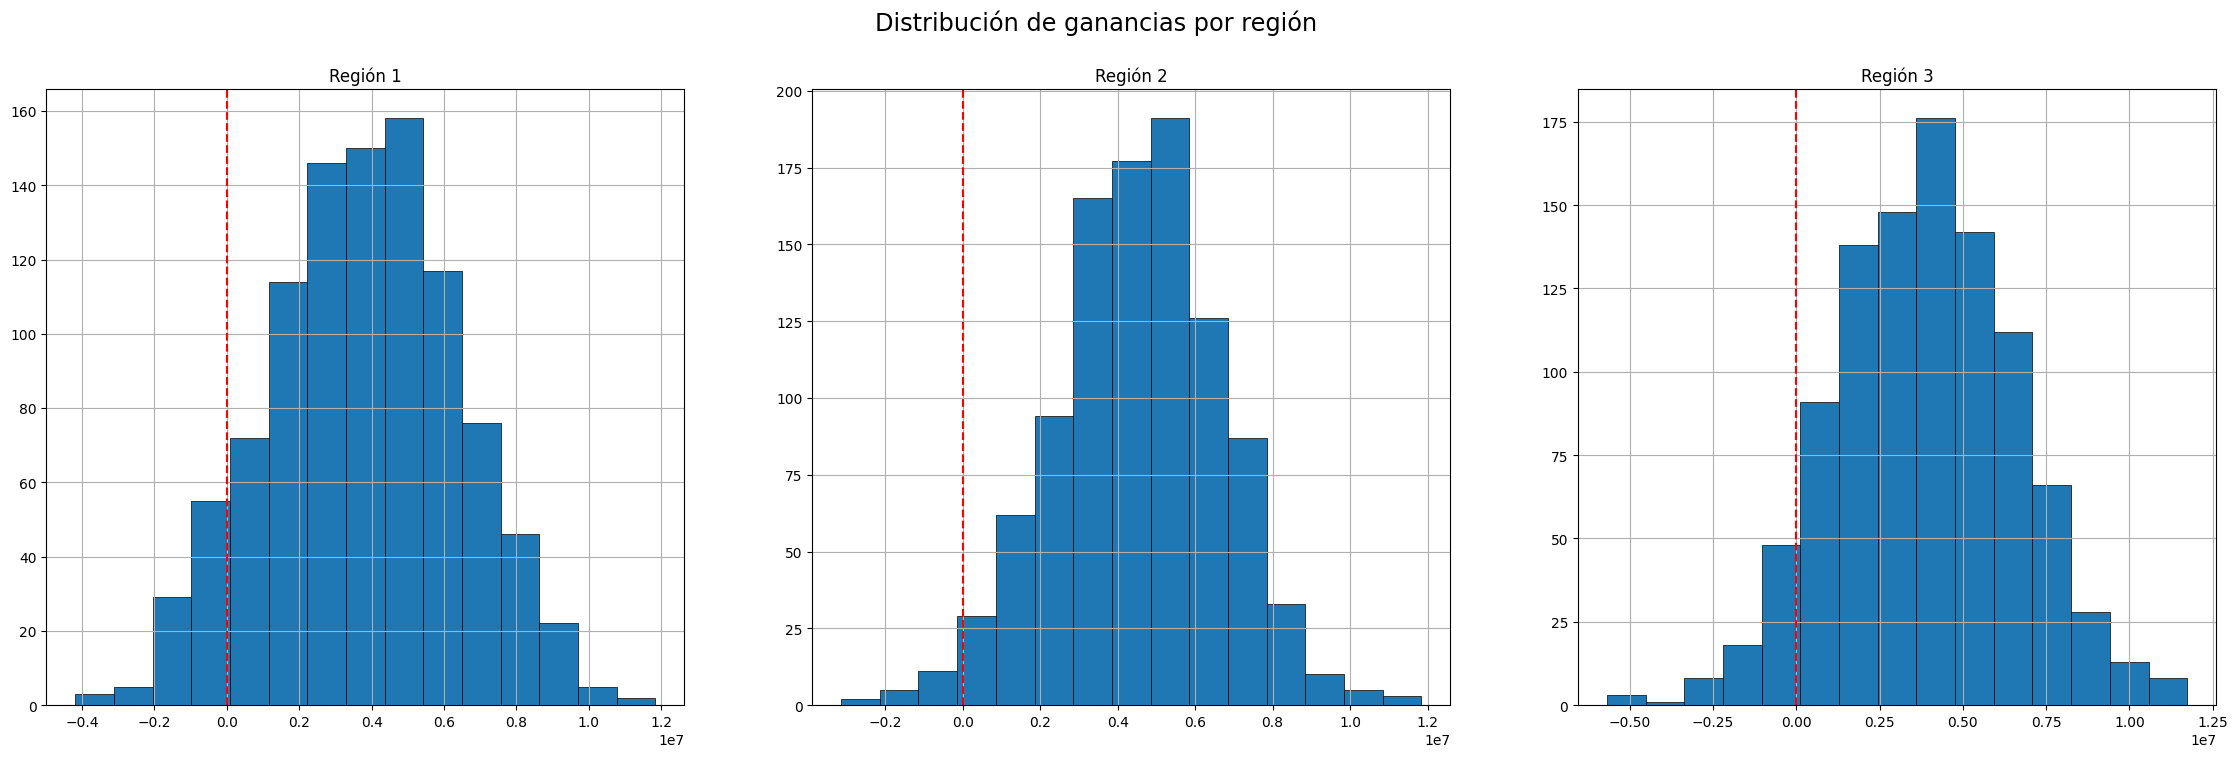

In [214]:
fig, axis = plt.subplots(ncols=3, nrows=1, figsize=(28, 8))
ax = axis.ravel()
revenues_1.hist(ax=ax[0], bins=15, edgecolor = 'black', linewidth = 0.5)
revenues_2.hist(ax=ax[1], bins=15, edgecolor = 'black', linewidth = 0.5)
revenues_3.hist(ax=ax[2], bins=15, edgecolor = 'black', linewidth = 0.5)

ax[0].set_title('Región 1')

ax[1].set_title('Región 2')

ax[2].set_title('Región 3')


ax[0].axvline(x=0, color='r', ls='--')
ax[1].axvline(x=0, color='r', ls='--')
ax[2].axvline(x=0, color='r', ls='--')

plt.suptitle('Distribución de ganancias por región', size='xx-large')
plt.show()

Al analizar los histogramas, podemos observar que la región 1 y 3 presentaron un mayor número de submuestras con ganancias negativas, mientras que en la región 1 se registraron menos submuestras con pérdidas, también cabe recalcar que en la región 2 y 3 se presentaron se indicaron picos más altos que indica un mayor número de submuestras con ganancias. 

In [215]:
revenues_boots = pd.DataFrame({
    'region': ['Región 1', 'Región 2', 'Región 3'],
    'mean_revenue': [round(mean_profit_1, 2),
                     round(mean_profit_2, 2),
                     round(mean_profit_3, 2)],
    'lower_confidence_interval_95%': [round(confidence_interval_1[0],3),
                                      round(confidence_interval_2[0],3),
                                      round(confidence_interval_3[0],3)],
    'upper_confidence_interval_95%': [round(confidence_interval_1[1],3),
                                      round(confidence_interval_2[1],3),
                                      round(confidence_interval_3[1],3)],
    'loss_risk_%' : [loss_risk_1, loss_risk_2, loss_risk_3]

})

revenues_boots

,region,mean_revenue,lower_confidence_interval_95%,upper_confidence_interval_95%,loss_risk_%
0,Región 1,3780281.36,-1274494.746,8902264.017,9.0
1,Región 2,4537342.58,366988.067,8539517.444,2.0
2,Región 3,3873315.67,-1350100.026,9157388.078,6.9


El beneficio promedio mayor se registra para la Región 2 con 4.5 millones de dólares de ganancias, seguida de la 3 con 3.8 milliones y por último la 1 con 3.7 millones.
Los intervalos de confianza, del 95%, las regiones 1 y 3 presentan un intervalo inferior negativo lo que confirma lo que se puede observar en los histogramas de frecuencias, esas dos regiones generaron mayor número de ganancias negativas.

En el análisis del intervalo superior, se observa que las regiones 1 y 3 presentaron los valores más altos para el percentil 97.5, lo que sugiere que, aunque algunas submuestras reflejan pérdidas, lograron obtener ganancias superiores a los 9 millones de dólares en ciertos escenarios.

En cuanto al análisis del riesgo de pérdida, la Región 2 mostró el menor porcentaje de ganancias negativas, con un riesgo de apenas 1.5%. Por otro lado, las regiones 1 y 3 presentaron riesgos significativamente mayores, con porcentajes de 9% y 6.9%, respectivamente.

Con base en estos resultados, se concluye que la REGIÓN 2 es la opción más favorable para el desarrollo de nuevos pozos. Esto se debe a que combina el beneficio promedio más alto entre las tres regiones con el nivel más bajo de riesgo de pérdidas, representando así una decisión estratégica ventajosa para OilyGiant.

# Conclusiones

Preprocesamiento de datos:

Se analizaron los datos de tres regiones para identificar aquella con el mayor margen de beneficio. No se detectaron valores faltantes ni duplicados en los datasets, y los tipos de datos eran correctos, por lo que no fue necesario realizar modificaciones.

Al examinar la distribución de las variables numéricas, se observó que las regiones 1 y 3 tenían distribuciones similares, con una ligera tendencia hacia la normalidad y un volumen promedio de crudo superior a 90,000 barriles. En contraste, la Región 2 mostró patrones de distribución diferentes y un menor volumen de producto.

Asimismo, se identificó una correlación positiva alta entre la variable f2 y el volumen de producto en los datos analizados.

Modelo de Regresión Lineal

Para construir el modelo, se eliminó la columna que contenía el identificador único de cada pozo, ya que no aportaba información relevante para predecir el volumen de producto. Se seleccionaron tres variables clave en los tres datasets para el modelo predictivo, las cuales fueron previamente estandarizadas.

Los datos de cada región se dividieron en conjuntos de entrenamiento y validación con una proporción del 75:25. Se definieron como características las variables f0, f1 y f2, y como objetivo, la variable product. Posteriormente, se desarrolló un modelo de regresión lineal para cada región, empleando una función que calculó el RMSE, el coeficiente de determinación (R²) y el volumen promedio previsto para las tres regiones.

Mejor Modelo: Entre los tres modelos, el de la REGIÓN 2 destacó por tener el menor error (RMSE) y el coeficiente de determinación (R²) más alto, lo que indica un mejor ajuste. Sin embargo, las regiones 1 y 3 mostraron un volumen promedio previsto más elevado.

Margen de Beneficio por Región

Con base en las consideraciones de OilyGiant para calcular el beneficio, se determinó que cada pozo debe producir un mínimo de 111,110 barriles para evitar pérdidas, considerando un costo de desarrollo de $500,000 por pozo. Al analizar los volúmenes promedio por región, se encontró que ninguna alcanza este umbral; el volumen promedio más alto corresponde a la Región 3, con 95,000 barriles.

Se desarrolló una función para calcular las ganancias en las 200 mejores ubicaciones con los volúmenes previstos más altos. En este análisis, la Región 1 destacó al generar las ganancias más altas, alcanzando los $33 millones. Las regiones 2 y 3 tuvieron ingresos inferiores, quedando por debajo de los $30 millones en ambos casos.

Utilizando la técnica de bootstrapping con 1,000 submuestras de tamaño 500 y considerando los 200 mejores pozos en cada submuestra, se concluyó que la REGIÓN 2 es la más adecuada para el desarrollo de pozos. Esta región registró un beneficio promedio de $4.5 millones y el menor riesgo de pérdida, con solo un 1.5%. Aunque tiene un menor volumen promedio de producto, es la región que generará mayores ganancias, cuenta con el modelo predictivo más preciso y obtuvo los mejores resultados al aplicar la metodología de exploración y análisis de 500 puntos que utiliza OilyGiant.